In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.1


In [2]:
csv_file = "C:\\Users\\ajord\\Downloads\\Motorcycle_Database.csv"
# n = "company_name,model,price,status,Body Type,Fuel Type,Engine Description,Fuel System,Cooling	Displacement,Maximum Power,Maximum,Torque,Number of Cylinders,Overall Length,Overall Width,Overall Height,Seat Height,Ground Clearance,Wheelbase,Kerb/Wet Weight,Fuel Tank Capacity,Bore,Stroke,Number of Gears,Clutch,Gearbox Type,Front Brake,Rear Brake,Front Suspension,Rear Suspension,0-100 kmph,Speedometer,Tachometer,Trip Meter,Clock,Electric Start"

motorcycle_train = pd.read_csv(csv_file, encoding= 'unicode_escape')
motorcycle_train.head()

,Page URL,Image URL,Make,Model,Year of launch,Category,Rating,Price as new (MSRP),Displacement (cm3),Engine type,...,Oil capacity (litres),Color options,Starter,Instruments,Electrical,Light,Carrying capacity,Factory warranty,Comments,Modifications compared to previous model
0,https://bikez.com/motorcycles/bmw_k_1_1993.php,https://bikez.com/pictures/bmw/1993/k 1.jpg,BMW,BMW K 1,1993,Unspecified category,67.6 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://bikez.com/motorcycles/bmw_k_1_1992.php,https://bikez.com/pictures/bmw/1992/k 1.jpg,BMW,BMW K 1,1992,Sport touring,69.2 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://bikez.com/motorcycles/bmw_k_1_1991.php,https://bikez.com/pictures/bmw/1991/k 1.jpg,BMW,BMW K 1,1991,Allround,71.7 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://bikez.com/motorcycles/bmw_k_1_1990.php,https://bikez.com/pictures/bmw/1990/k 1.jpg,BMW,BMW K 1,1990,Classic,67.4 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://bikez.com/motorcycles/bmw_k_1_1989.php,https://bikez.com/pictures/bmw/1989/k 1.jpg,BMW,BMW K 1,1989,Sport touring,65.7 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
motorcycle_train.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '_').replace(',', '_') for col in motorcycle_train.columns]
motorcycle_train.head(1)

,page_url,image_url,make,model,year_of_launch,category,rating,price_as_new__msrp_,displacement__cm3_,engine_type,...,oil_capacity__litres_,color_options,starter,instruments,electrical,light,carrying_capacity,factory_warranty,comments,modifications_compared_to_previous_model
0,https://bikez.com/motorcycles/bmw_k_1_1993.php,https://bikez.com/pictures/bmw/1993/k 1.jpg,BMW,BMW K 1,1993,Unspecified category,67.6 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0       987.0
1       987.0
2       987.0
3       987.0
4       987.0
        ...  
403     749.0
404     749.0
405     749.0
406     749.0
407    1002.0
Name: displacement__cm3_, Length: 408, dtype: float64


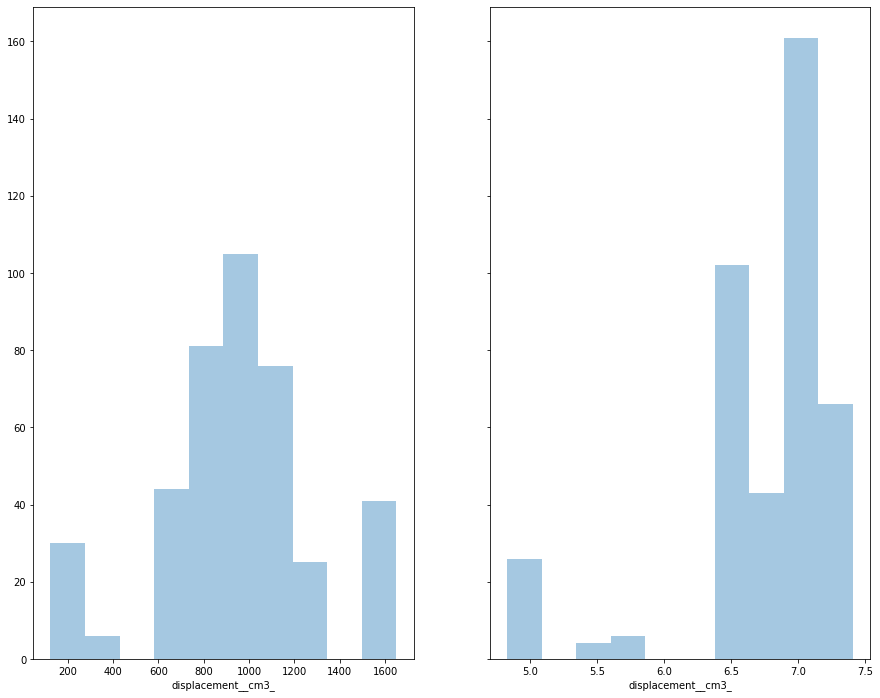

In [4]:
motorcycle_features = motorcycle_train.copy()
displacement_dist = motorcycle_features.pop('displacement__cm3_').dropna()
print(displacement_dist)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,12), sharey=True)
fig.subplots_adjust(wspace=.2)

sns.distplot(displacement_dist, bins=10, kde=False, ax=ax1)
sns.distplot(np.log(displacement_dist), bins=10, kde=False, ax=ax2)

# ax1.hist(displacement_dist,bins='sqrt')
# ax2.hist(displacement_dist,bins='sqrt',log=True)

# ax1.set_xlabel("Displacement (cm3)")
# ax2.set_xlabel("Displacement (cm3)")

# ax1.set_ylabel("Count")
# ax2.set_ylabel("Count")

# ax1.set_xlim([motorcycle_labels.min(),motorcycle_labels.max()])
# ax2.set_xlim([motorcycle_labels.min(),motorcycle_labels.max()])

# ax1.set_ylim([0,200])
# ax2.set_ylim([0,200])

plt.savefig('distributuion.png')
plt.show()

In [5]:
motorcycle_train['displacement__cm3_'].describe()

count     408.000000
mean      938.979559
std       368.549988
min       124.660000
25%       740.000000
50%       987.000000
75%      1157.000000
max      1649.000000
Name: displacement__cm3_, dtype: float64

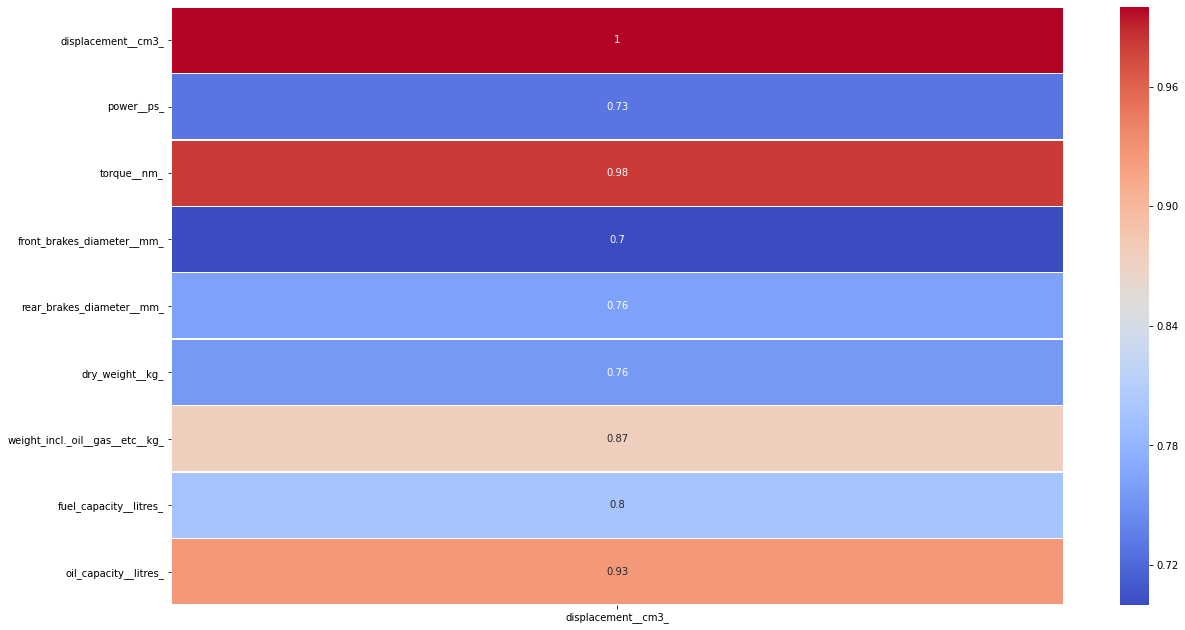

In [6]:
plt.figure(figsize=(20, 11))

sns.heatmap(motorcycle_train.corr()[['displacement__cm3_']][round(motorcycle_train.corr()['displacement__cm3_'].sort_values(ascending=False), 1) >= .5], annot=True, cmap='coolwarm', linewidth=0.5)

plt.savefig('heatmap.png')
plt.show()

In [7]:
print(motorcycle_train['torque__nm_'])

0      100.03
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
403     72.10
404     72.00
405     72.00
406       NaN
407    108.30
Name: torque__nm_, Length: 408, dtype: float64


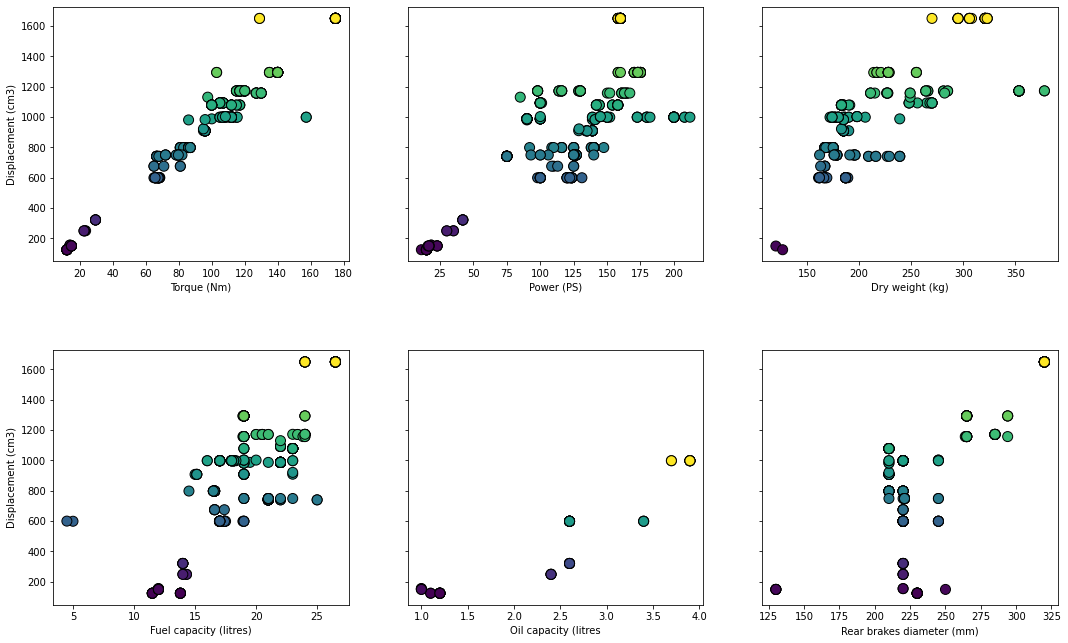

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize= (18, 11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)

ax[0,0].scatter(motorcycle_train['torque__nm_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')
ax[0,1].scatter(motorcycle_train['power__ps_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')
ax[0,2].scatter(motorcycle_train['dry_weight__kg_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')
ax[1,0].scatter(motorcycle_train['fuel_capacity__litres_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')
ax[1,1].scatter(motorcycle_train['oil_capacity__litres_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')
ax[1,2].scatter(motorcycle_train['rear_brakes_diameter__mm_'], motorcycle_train['displacement__cm3_'], c=motorcycle_train['displacement__cm3_'], s=100, edgecolors='black')

ax[0,0].set_ylabel('Displacement (cm3)')
ax[1,0].set_ylabel('Displacement (cm3)')

ax[0,0].set_xlabel('Torque (Nm)')
ax[0,1].set_xlabel('Power (PS)')
ax[0,2].set_xlabel('Dry weight (kg)')
ax[1,0].set_xlabel('Fuel capacity (litres)')
ax[1,1].set_xlabel('Oil capacity (litres')
ax[1,2].set_xlabel('Rear brakes diameter (mm)')

plt.savefig('scatterplot.png')
plt.show()

In [9]:
features = motorcycle_train.copy()
labels = features.pop('displacement__cm3_')

# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Do a calculation using is
result = 2*input + 1

# the result doesn't have a value
print(result)

calc = tf.keras.Model(inputs=input, outputs=result)

Tensor("AddV2:0", shape=(None,), dtype=float32)


In [10]:
inputs = {}

for name, column in features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

print(inputs)

{'page_url': <tf.Tensor 'page_url:0' shape=(None, 1) dtype=string>, 'image_url': <tf.Tensor 'image_url:0' shape=(None, 1) dtype=string>, 'make': <tf.Tensor 'make:0' shape=(None, 1) dtype=string>, 'model': <tf.Tensor 'model:0' shape=(None, 1) dtype=string>, 'year_of_launch': <tf.Tensor 'year_of_launch:0' shape=(None, 1) dtype=float32>, 'category': <tf.Tensor 'category:0' shape=(None, 1) dtype=string>, 'rating': <tf.Tensor 'rating:0' shape=(None, 1) dtype=string>, 'price_as_new__msrp_': <tf.Tensor 'price_as_new__msrp_:0' shape=(None, 1) dtype=string>, 'engine_type': <tf.Tensor 'engine_type:0' shape=(None, 1) dtype=string>, 'engine_details': <tf.Tensor 'engine_details:0' shape=(None, 1) dtype=string>, 'power__ps_': <tf.Tensor 'power__ps_:0' shape=(None, 1) dtype=float32>, 'power__rpm_': <tf.Tensor 'power__rpm_:0' shape=(None, 1) dtype=float32>, 'torque__nm_': <tf.Tensor 'torque__nm_:0' shape=(None, 1) dtype=float32>, 'torque__rpm_': <tf.Tensor 'torque__rpm_:0' shape=(None, 1) dtype=float3

In [11]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(motorcycle_train[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

print(all_numeric_inputs)

preprocessed_inputs = [all_numeric_inputs]

Tensor("normalization/truediv:0", shape=(None, 27), dtype=float32)


In [12]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = preprocessing.StringLookup(vocabulary=np.unique(features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

TypeError: '<' not supported between instances of 'float' and 'str'